In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
HC_Data = pd.read_csv("HC Data.csv")

## 2.	Data Report:
 
### a) Understanding how data was collected in terms of time, frequency and methodology	





In [3]:
HC_Data

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,29995,3,0,0,Salried,4,225 to 250,5614,22,0,...,smokes,2000.0,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,...,never smoked,2009.0,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,...,Unknown,NaN,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salried,2,225 to 250,10777,27,0,...,Unknown,NaN,Surat,74,N,Rare,Moderate,0,40,30850


### b) Visual inspection of data (rows, columns, descriptive details)	 


In [4]:
print('The number of rows (observations) is',HC_Data.shape[0],'\n''The number of columns (variables) is',HC_Data.shape[1])

The number of rows (observations) is 25000 
The number of columns (variables) is 24


In [5]:
HC_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [6]:
HC_Data.describe()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Year_last_admitted,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,17499.500000,4.089040,0.773680,0.081720,3.104200,5215.889320,44.918320,0.054640,0.098160,167.530000,31.393328,2003.892217,71.610480,2.517960,28.812280,27147.407680
std,7217.022701,2.606612,1.199449,0.273943,1.141663,1053.179748,16.107492,0.227281,0.297537,62.729712,7.876535,7.581521,9.325183,1.690335,8.632382,14323.691832
min,5000.000000,0.000000,0.000000,0.000000,0.000000,2034.000000,16.000000,0.000000,0.000000,57.000000,12.300000,1990.000000,52.000000,0.000000,11.000000,2468.000000
25%,11249.750000,2.000000,0.000000,0.000000,2.000000,4543.000000,31.000000,0.000000,0.000000,113.000000,26.100000,1997.000000,64.000000,1.000000,21.000000,16042.000000
50%,17499.500000,4.000000,0.000000,0.000000,3.000000,5089.000000,45.000000,0.000000,0.000000,168.000000,30.500000,2004.000000,72.000000,3.000000,31.000000,27148.000000
75%,23749.250000,6.000000,1.000000,0.000000,4.000000,5730.000000,59.000000,0.000000,0.000000,222.000000,35.600000,2010.000000,78.000000,4.000000,36.000000,37020.000000
max,29999.000000,8.000000,5.000000,1.000000,12.000000,11255.000000,74.000000,1.000000,1.000000,277.000000,100.600000,2018.000000,96.000000,6.000000,42.000000,67870.000000


### c) Understanding of attributes (variable info, renaming if required)


In [7]:
HC_Data.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [8]:
total_rows = len(HC_Data)

# Calculate the number of missing values in the 'Year_last_admitted' column
missing_values = HC_Data['Year_last_admitted'].isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / total_rows) * 100

print("Missing percentage:", missing_percentage, "%")

Missing percentage: 47.524 %


In [9]:
total_rows = len(HC_Data)

# Calculate the number of missing values in the 'Year_last_admitted' column
missing_values = HC_Data['bmi'].isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / total_rows) * 100

print("Missing percentage:", missing_percentage, "%")

Missing percentage: 3.9600000000000004 %


### a) Removal of unwanted variables (if applicable)	 

In [10]:
unwanted_variables = ['Year_last_admitted']

# Drop the unwanted variables from the DataFrame
HC_Data = HC_Data.drop(columns=unwanted_variables)

In [11]:
HC_Data

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,31.2,Unknown,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,34.2,formerly smoked,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,40.4,formerly smoked,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,22.9,Unknown,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,26.5,never smoked,Bangalore,74,N,No,Extreme,0,34,29616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,29995,3,0,0,Salried,4,225 to 250,5614,22,0,...,36.1,smokes,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,...,31.3,never smoked,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,...,NaN,Unknown,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salried,2,225 to 250,10777,27,0,...,26.6,Unknown,Surat,74,N,Rare,Moderate,0,40,30850


### b) Missing Value treatment (if applicable)	 

In [12]:
columns_with_missing = ['bmi']

# Fill missing values in 'bmi' column with mean
HC_Data['bmi'].fillna(HC_Data['bmi'].mean(), inplace=True)

In [13]:
HC_Data.isnull().sum()

applicant_id                      0
years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

### d) Outlier treatment (if required)	 

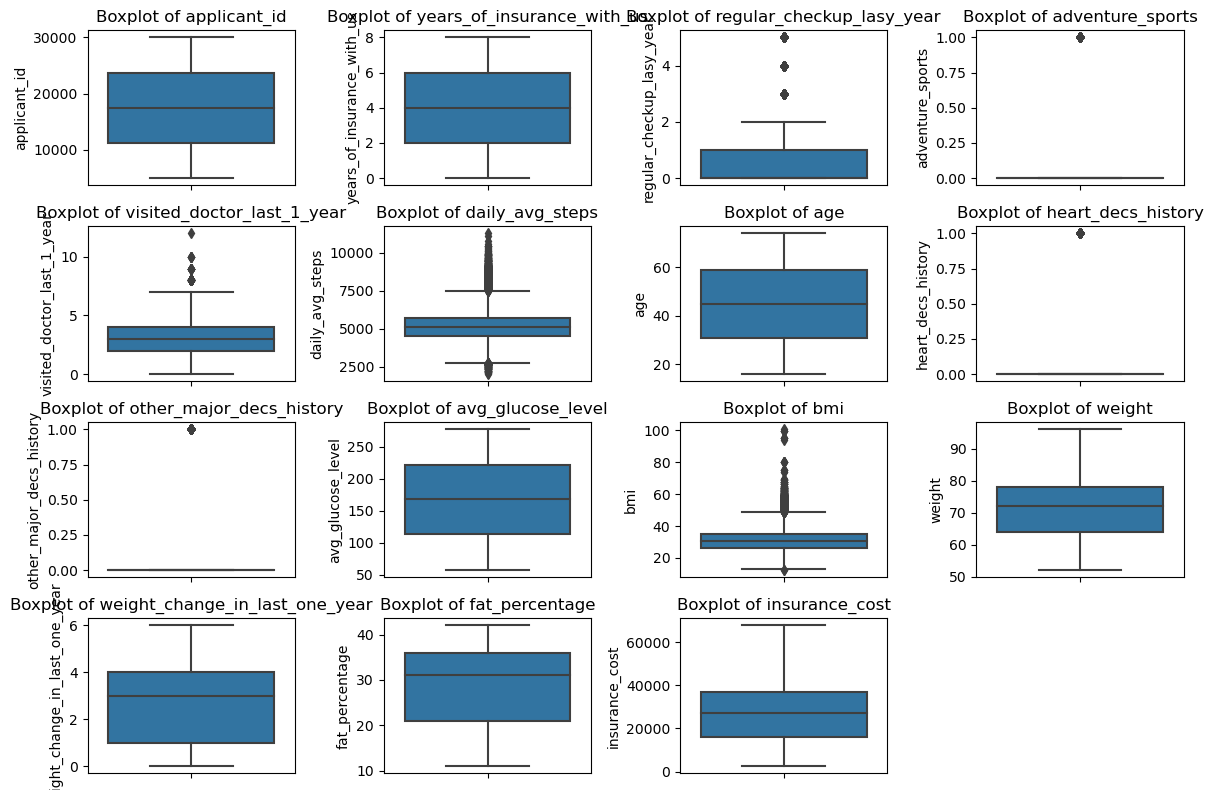

In [14]:
data=HC_Data = HC_Data.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize = (12,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [15]:
# Defining a funtion to remove outliers
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [16]:
for i in feature_list:
    LL, UL = remove_outlier(data[i])
    data[i] = np.where(data[i] > UL, UL, data[i])
    data[i] = np.where(data[i] < LL, LL, data[i])

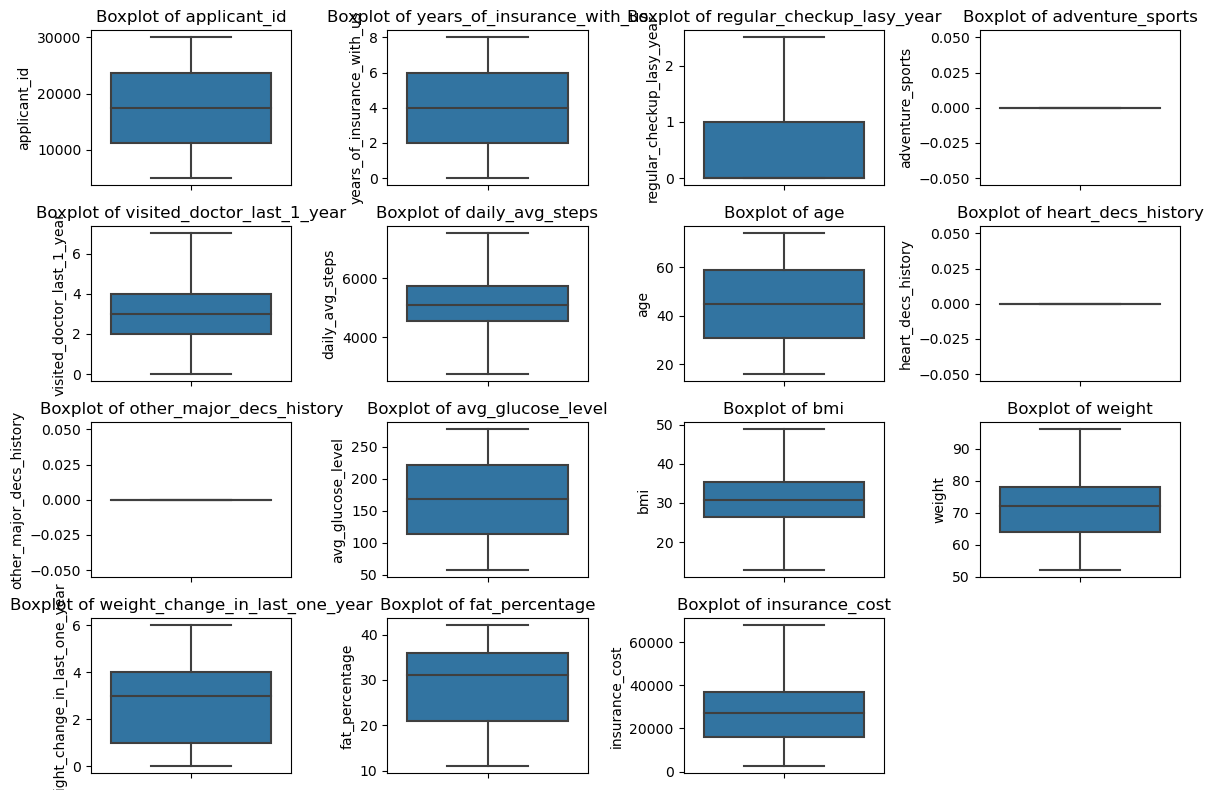

In [17]:
plt.figure(figsize = (12,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### e) Variable transformation (if applicable)	 

In [18]:
categorical_columns = ['covered_by_any_other_company', 'Gender']

In [19]:
print(HC_Data.columns)

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'daily_avg_steps', 'age',
       'heart_decs_history', 'other_major_decs_history', 'avg_glucose_level',
       'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost'],
      dtype='object')


## Linear Regression Model

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [21]:
columns_to_scale = ['years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'daily_avg_steps', 'age',
       'heart_decs_history', 'other_major_decs_history', 'avg_glucose_level',
       'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost']

# Initialize StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()

# Scale the selected columns using StandardScaler
HC_Data_scaled_standard = scaler_standard.fit_transform(HC_Data[columns_to_scale])
HC_Data_scaled_standard = pd.DataFrame(HC_Data_scaled_standard, columns=columns_to_scale)



# Concatenate the scaled columns with the rest of the dataset
HC_Data_scaled_standard = pd.concat([HC_Data_scaled_standard, HC_Data.drop(columns=columns_to_scale)], axis=1)

# Print the scaled datasets
print("Standardized Data:")
print(HC_Data_scaled_standard.head())

Standardized Data:
   years_of_insurance_with_us  regular_checkup_lasy_year  adventure_sports  \
0                   -0.417807                   0.374779               0.0   
1                   -1.568750                  -0.714377               0.0   
2                   -1.185102                  -0.714377               0.0   
3                    1.116783                   2.008512               0.0   
4                   -0.417807                   0.374779               0.0   

   visited_doctor_last_1_year  daily_avg_steps       age  heart_decs_history  \
0                   -0.980772        -0.333160 -1.050360                 0.0   
1                    0.803748         1.260326  0.315492                 0.0   
2                    0.803748        -0.701364  1.433007                 0.0   
3                   -0.980772         1.057144  0.377576                 0.0   
4                   -0.980772        -0.258901 -0.057013                 0.0   

   other_major_decs_history  av

In [22]:
HC_Data_scaled_standard.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,applicant_id
0,-0.417807,0.374779,0.0,-0.980772,-0.333160,-1.050360,0.0,0.0,-1.124370,-0.002727,-0.494422,-0.898041,-0.441634,-0.430722,5000.0
1,-1.568750,-0.714377,0.0,0.803748,1.260326,0.315492,0.0,0.0,0.708929,0.417798,-1.459569,0.285180,-0.209944,-1.464554,5001.0
2,-1.185102,-0.714377,0.0,0.803748,-0.701364,1.433007,0.0,0.0,-0.024391,1.286883,0.149010,-1.489652,0.369282,0.086194,5002.0
3,1.116783,2.008512,0.0,-0.980772,1.057144,0.377576,0.0,0.0,-0.933069,-1.166180,-0.065467,0.285180,0.948508,0.000041,5003.0
4,-0.417807,0.374779,0.0,-0.980772,-0.258901,-0.057013,0.0,0.0,-0.789594,-0.661550,0.256249,-1.489652,0.600972,0.172347,5004.0


In [23]:
# Copy all the predictor variables into X dataframe
X = HC_Data_scaled_standard.drop('insurance_cost', axis=1)

# Copy target into the y dataframe. 
y = HC_Data_scaled_standard[['insurance_cost']]

In [24]:
X.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,applicant_id
0,-0.417807,0.374779,0.0,-0.980772,-0.333160,-1.050360,0.0,0.0,-1.124370,-0.002727,-0.494422,-0.898041,-0.441634,5000.0
1,-1.568750,-0.714377,0.0,0.803748,1.260326,0.315492,0.0,0.0,0.708929,0.417798,-1.459569,0.285180,-0.209944,5001.0
2,-1.185102,-0.714377,0.0,0.803748,-0.701364,1.433007,0.0,0.0,-0.024391,1.286883,0.149010,-1.489652,0.369282,5002.0
3,1.116783,2.008512,0.0,-0.980772,1.057144,0.377576,0.0,0.0,-0.933069,-1.166180,-0.065467,0.285180,0.948508,5003.0
4,-0.417807,0.374779,0.0,-0.980772,-0.258901,-0.057013,0.0,0.0,-0.789594,-0.661550,0.256249,-1.489652,0.600972,5004.0


In [25]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [27]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for years_of_insurance_with_us is 0.008333037813624525
The coefficient for regular_checkup_lasy_year is -0.03855146554611448
The coefficient for adventure_sports is -1.1102230246251565e-16
The coefficient for visited_doctor_last_1_year is -0.002726651369701587
The coefficient for daily_avg_steps is -0.0018754264222198786
The coefficient for age is 0.003382992223160969
The coefficient for heart_decs_history is -6.938893903907228e-18
The coefficient for other_major_decs_history is -1.3877787807814457e-17
The coefficient for avg_glucose_level is 0.001212951371608237
The coefficient for bmi is 0.00013834540809201735
The coefficient for weight is 0.9715190558543026
The coefficient for weight_change_in_last_one_year is 0.017747384844795214
The coefficient for fat_percentage is -0.00041143168730505106
The coefficient for applicant_id is 2.2689350082094606e-07


In [29]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.003301218753911274


In [30]:
# R square on training data
regression_model.score(X_train, y_train)

0.9432970370670091

In [31]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9435897346592227

In [32]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.2388096124148025

In [33]:

#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.23542515259928345

### Linear Regression using statsmodels(OLS)¶


In [34]:
import statsmodels.api as sm

In [35]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [36]:
model = sm.OLS(y_train,X_train).fit()
model

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:29:52   Log-Likelihood:                 246.56
No. Observations:               18750   AIC:                            -469.1
Df Residuals:                   18738   BIC:                            -375.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0033      0.005     -0.718      0.473      -0.012       0.006
years_of_insurance_with_us         0.0083      0.002      4.778      0.000       0.005       0.012
regular_checkup_lasy_year         -0.0386      0.002    -21.790      0.000      -0.042      -0.035
adventure_sports                1.431e-16   7.01e-19    204.019      0.000    1.42e-16    1.44e-16
visited_doctor_last_1_year        -0.0027      0.002     -1.534      0.125      -0.006       0.001
daily_avg_steps                   -0.0019      0.002     -1.054      0.292      -0.005       0.002
age                                0.0034      0.002      1.940      0.052   -3.48e-05       0.007
heart_decs_history             -2.778e-18   2.26e-19    -12.316      0.000   -3.22e-18   -2.34e-18
other_major_decs_history         2.43e-19   4.59e-19      0.529      0.597   -6.57e-19    1.14e-18
avg_glucose_level                  0.0012      0.002      0.695      0.487      -0.002       0.005
bmi                                0.0001      0.002      0.079      0.937      -0.003       0.004
weight                             0.9715      0.002    510.868      0.000       0.968       0.975
weight_change_in_last_one_year     0.0177      0.002      9.414      0.000       0.014       0.021
fat_percentage                    -0.0004      0.002     -0.236      0.814      -0.004       0.003
applicant_id                    2.269e-07   2.42e-07      0.936      0.349   -2.48e-07    7.02e-07
==============================================================================
Omnibus:                      481.841   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.226
Skew:                           0.368   Prob(JB):                    2.98e-118
Kurtosis:                       3.388   Cond. No.                     2.48e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
#Calculate MSE on train
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)

In [39]:
np.sqrt(mse) #RMSE on train 

0.2388096124148025

In [40]:
# Prediction on Test data
y_pred = model.predict(X_test)

In [41]:
#Calculate MSE on test
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse) #RMSE on test

0.23542515259929703

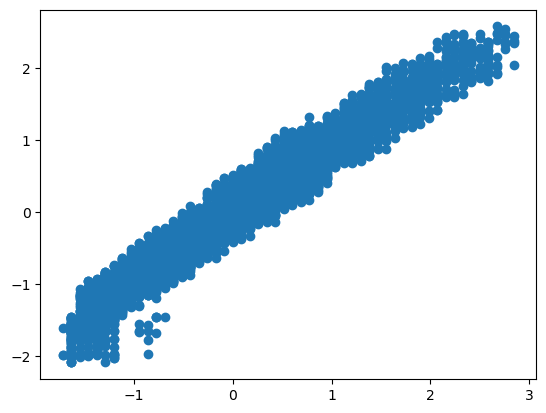

In [42]:
plt.scatter(y_test, y_pred)
plt.show()

In [43]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * const + (0.01) * years_of_insurance_with_us + (-0.04) * regular_checkup_lasy_year + (0.0) * adventure_sports + (-0.0) * visited_doctor_last_1_year + (-0.0) * daily_avg_steps + (0.0) * age + (-0.0) * heart_decs_history + (0.0) * other_major_decs_history + (0.0) * avg_glucose_level + (0.0) * bmi + (0.97) * weight + (0.02) * weight_change_in_last_one_year + (-0.0) * fat_percentage + (0.0) * applicant_id + 

### Ridge Model

In [44]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [45]:
from sklearn.metrics import r2_score

In [46]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00  8.33278901e-03 -3.85536263e-02  0.00000000e+00
  -2.72634345e-03 -1.87537140e-03  3.38287204e-03  0.00000000e+00
   0.00000000e+00  1.21288910e-03  1.38350169e-04  9.71500567e-01
   1.77401436e-02 -4.11452404e-04  2.26908073e-07]]


### LASSO model

In [47]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  8.70925569e-01
 -0.00000000e+00 -0.00000000e+00  3.11986691e-07]


### Let us compare their scores



In [48]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9432970367804934
0.9435898036885377


In [49]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9315293413605128
0.9322561329497376


In [50]:
linear_reg_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value

# Train the models
linear_reg_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict using the trained models
y_pred_linear_reg = linear_reg_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate metrics
linear_reg_mse = mse(y_test, y_pred_linear_reg)
ridge_mse = mse(y_test, y_pred_ridge)
lasso_mse = mse(y_test, y_pred_lasso)

linear_reg_r2 = r2_score(y_test, y_pred_linear_reg)
ridge_r2 = r2_score(y_test, y_pred_ridge)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Print model scores
print("Linear Regression - MSE:", linear_reg_mse)
print("Linear Regression - R^2:", linear_reg_r2)
print("Ridge Regression - MSE:", ridge_mse)
print("Ridge Regression - R^2:", ridge_r2)
print("Lasso Regression - MSE:", lasso_mse)
print("Lasso Regression - R^2:", lasso_r2)

TypeError: 'numpy.float64' object is not callable

In [ ]:
pip install scikit-learn

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
linear_reg_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value

# Train the models
linear_reg_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict using the trained models
y_pred_linear_reg = linear_reg_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate metrics
linear_reg_mse = mean_squared_error(y_test, y_pred_linear_reg)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

linear_reg_r2 = r2_score(y_test, y_pred_linear_reg)
ridge_r2 = r2_score(y_test, y_pred_ridge)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Print model scores
print("Linear Regression - MSE:", linear_reg_mse)
print("Linear Regression - R^2:", linear_reg_r2)
print("Ridge Regression - MSE:", ridge_mse)
print("Ridge Regression - R^2:", ridge_r2)
print("Lasso Regression - MSE:", lasso_mse)
print("Lasso Regression - R^2:", lasso_r2)

Linear Regression - MSE: 0.05542500247639602
Linear Regression - R^2: 0.9435897346592226
Ridge Regression - MSE: 0.055424778629897226
Ridge Regression - R^2: 0.9435899624849299
Lasso Regression - MSE: 0.9828535052986102
Lasso Regression - R^2: -0.0003252060948384372


In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have X_train, X_test, y_train, y_test prepared
# Replace with your actual data

# Initialize the models
linear_reg_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value

# Train the models
linear_reg_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict using the trained models
y_pred_linear_reg = linear_reg_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate metrics for Linear Regression
linear_reg_r2 = r2_score(y_test, y_pred_linear_reg)
linear_reg_mse = mean_squared_error(y_test, y_pred_linear_reg)
linear_reg_rmse = np.sqrt(linear_reg_mse)

# Calculate metrics for Ridge
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)

# Calculate metrics for Lasso
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)

# Calculate Adjusted R-squared for Linear Regression
n = len(y_test)
p = X_test.shape[1]
linear_reg_adjusted_r2 = 1 - ((1 - linear_reg_r2) * (n - 1) / (n - p - 1))

# Calculate Adjusted R-squared for Ridge
ridge_adjusted_r2 = 1 - ((1 - ridge_r2) * (n - 1) / (n - p - 1))

# Calculate Adjusted R-squared for Lasso
lasso_adjusted_r2 = 1 - ((1 - lasso_r2) * (n - 1) / (n - p - 1))

# Print model summary
print("Linear Regression:")
print("R-squared:", linear_reg_r2)
print("Adjusted R-squared:", linear_reg_adjusted_r2)
print("MSE:", linear_reg_mse)
print("RMSE:", linear_reg_rmse)

print("\nRidge Regression:")
print("R-squared:", ridge_r2)
print("Adjusted R-squared:", ridge_adjusted_r2)
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)

print("\nLasso Regression:")
print("R-squared:", lasso_r2)
print("Adjusted R-squared:", lasso_adjusted_r2)
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse)

Linear Regression:
R-squared: 0.9435897346592226
Adjusted R-squared: 0.9434540025482006
MSE: 0.05542500247639602
RMSE: 0.2354251525992837

Ridge Regression:
R-squared: 0.9435899624849299
Adjusted R-squared: 0.9434542309220928
MSE: 0.055424778629897226
RMSE: 0.23542467718974835

Lasso Regression:
R-squared: -0.0003252060948384372
Adjusted R-squared: -0.002732148361669129
MSE: 0.9828535052986102
RMSE: 0.9913896838774399


### Elastic net model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming you have X_train, X_test, y_train, y_test prepared
# Replace with your actual data

# Initialize the Elastic Net model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio values

# Train the model
elastic_net_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Calculate R-squared (R2)
elastic_net_r2 = r2_score(y_test, y_pred_elastic_net)

# Calculate Mean Squared Error (MSE)
elastic_net_mse = mean_squared_error(y_test, y_pred_elastic_net)

# Calculate Root Mean Squared Error (RMSE)
elastic_net_rmse = np.sqrt(elastic_net_mse)

# Print model summary
print("Elastic Net Regression:")
print("R-squared:", elastic_net_r2)
print("MSE:", elastic_net_mse)
print("RMSE:", elastic_net_rmse)

Elastic Net Regression:
R-squared: 0.513570025627577
MSE: 0.47793397835155876
RMSE: 0.691327692452399


### Decision Tree

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming you have X_train, X_test, y_train, y_test prepared
# Replace with your actual data

# Initialize the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(max_depth=None)  # You can adjust hyperparameters

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate R-squared (R2)
decision_tree_r2 = r2_score(y_test, y_pred_decision_tree)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of samples
p = X_test.shape[1]  # Number of features
decision_tree_adjusted_r2 = 1 - ((1 - decision_tree_r2) * (n - 1) / (n - p - 1))

# Calculate Mean Squared Error (MSE)
decision_tree_mse = mean_squared_error(y_test, y_pred_decision_tree)

# Calculate Root Mean Squared Error (RMSE)
decision_tree_rmse = np.sqrt(decision_tree_mse)

# Print model summary
print("Decision Tree Regressor:")
print("R-squared:", decision_tree_r2)
print("Adjusted R-squared:", decision_tree_adjusted_r2)
print("MSE:", decision_tree_mse)
print("RMSE:", decision_tree_rmse)

Decision Tree Regressor:
R-squared: 0.9014590042298147
Adjusted R-squared: 0.9012218988501944
MSE: 0.09681987669433965
RMSE: 0.31115892514009563


### Random Forest Regressor

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming you have X_train, X_test, y_train, y_test prepared
# Replace with your actual data

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=None)  # You can adjust hyperparameters

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate R-squared (R2)
random_forest_r2 = r2_score(y_test, y_pred_random_forest)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of samples
p = X_test.shape[1]  # Number of features
random_forest_adjusted_r2 = 1 - ((1 - random_forest_r2) * (n - 1) / (n - p - 1))

# Calculate Mean Squared Error (MSE)
random_forest_mse = mean_squared_error(y_test, y_pred_random_forest)

# Calculate Root Mean Squared Error (RMSE)
random_forest_rmse = np.sqrt(random_forest_mse)

# Print model summary
print("Random Forest Regressor:")
print("R-squared:", random_forest_r2)
print("Adjusted R-squared:", random_forest_adjusted_r2)
print("MSE:", random_forest_mse)
print("RMSE:", random_forest_rmse)

Random Forest Regressor:
R-squared: 0.9497728332809717
Adjusted R-squared: 0.9496519786931011
MSE: 0.04934989798341072
RMSE: 0.22214836930171403


In [58]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)
linear_reg_r2 = r2_score(y_test, y_pred_linear_reg)
linear_reg_mse = mean_squared_error(y_test, y_pred_linear_reg)
linear_reg_rmse = np.sqrt(linear_reg_mse)
n = len(y_test)
p = X_test.shape[1]
linear_reg_adjusted_r2 = 1 - ((1 - linear_reg_r2) * (n - 1) / (n - p - 1))

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_adjusted_r2 = 1 - ((1 - ridge_r2) * (n - 1) / (n - p - 1))

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_adjusted_r2 = 1 - ((1 - lasso_r2) * (n - 1) / (n - p - 1))

# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(max_depth=None)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
decision_tree_r2 = r2_score(y_test, y_pred_decision_tree)
decision_tree_mse = mean_squared_error(y_test, y_pred_decision_tree)
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_adjusted_r2 = 1 - ((1 - decision_tree_r2) * (n - 1) / (n - p - 1))

# Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=None)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
random_forest_r2 = r2_score(y_test, y_pred_random_forest)
random_forest_mse = mean_squared_error(y_test, y_pred_random_forest)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_adjusted_r2 = 1 - ((1 - random_forest_r2) * (n - 1) / (n - p - 1))

# Print model summaries
print("Linear Regression:")
print("R-squared:", linear_reg_r2)
print("Adjusted R-squared:", linear_reg_adjusted_r2)
print("MSE:", linear_reg_mse)
print("RMSE:", linear_reg_rmse)
print()

print("Ridge Regression:")
print("R-squared:", ridge_r2)
print("Adjusted R-squared:", ridge_adjusted_r2)
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print()

print("Lasso Regression:")
print("R-squared:", lasso_r2)
print("Adjusted R-squared:", lasso_adjusted_r2)
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse)
print()

print("Decision Tree Regressor:")
print("R-squared:", decision_tree_r2)
print("Adjusted R-squared:", decision_tree_adjusted_r2)
print("MSE:", decision_tree_mse)
print("RMSE:", decision_tree_rmse)
print()

print("Random Forest Regressor:")
print("R-squared:", random_forest_r2)
print("Adjusted R-squared:", random_forest_adjusted_r2)
print("MSE:", random_forest_mse)
print("RMSE:", random_forest_rmse)

Linear Regression:
R-squared: 0.9435897346592226
Adjusted R-squared: 0.9434540025482006
MSE: 0.05542500247639602
RMSE: 0.2354251525992837

Ridge Regression:
R-squared: 0.9435899624849299
Adjusted R-squared: 0.9434542309220928
MSE: 0.055424778629897226
RMSE: 0.23542467718974835

Lasso Regression:
R-squared: -0.0003252060948384372
Adjusted R-squared: -0.002732148361669129
MSE: 0.9828535052986102
RMSE: 0.9913896838774399

Decision Tree Regressor:
R-squared: 0.9010758537090224
Adjusted R-squared: 0.9008378264080336
MSE: 0.09719633510018924
RMSE: 0.31176326772118174

Random Forest Regressor:
R-squared: 0.9497150881462522
Adjusted R-squared: 0.9495940946143615
MSE: 0.04940663454040966
RMSE: 0.22227603231209986


## b. Test your predictive model against the test set using various appropriate performance metrics

In [59]:
import statsmodels.api as sm

# Assuming you have already prepared your training data X_train and y_train

# Step 1: Fit a linear regression model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Step 2: Get summary to see p-values
summary = model.summary()
print(summary)

# Step 3: Identify insignificant variables
insignificant_vars = summary.tables[1].data
insignificant_vars = [row[0] for row in insignificant_vars if float(row[4]) > 0.05]

# Step 4: Remove insignificant variables from X_train
X_train_reduced = X_train.drop(columns=insignificant_vars)

# Step 5: Refit the model with the remaining significant variables
model_reduced = sm.OLS(y_train, sm.add_constant(X_train_reduced)).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:38:20   Log-Likelihood:                 246.56
No. Observations:               18750   AIC:                            -469.1
Df Residuals:                   18738   BIC:                            -375.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

ValueError: could not convert string to float: 'P>|t|'

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have X_train prepared
# Replace with your actual data

# Calculate VIF for each feature in the dataset
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display the VIF for each feature
print(vif_data)

# Identify features with high VIF (> 5)
high_vif_features = vif_data[vif_data["VIF"] > 5]["feature"]

# Remove features with high VIF from X_train
X_train_low_vif = X_train.drop(columns=high_vif_features)

# Fit your chosen model (e.g., Random Forest) on X_train_low_vif
random_forest_model.fit(X_train_low_vif, y_train)

                           feature       VIF
0                            const  6.937602
1       years_of_insurance_with_us  1.000653
2        regular_checkup_lasy_year  1.027435
3                 adventure_sports       NaN
4       visited_doctor_last_1_year  1.030305
5                  daily_avg_steps  1.030659
6                              age  1.000422
7               heart_decs_history       NaN
8         other_major_decs_history       NaN
9                avg_glucose_level  1.000600
10                             bmi  1.001192
11                          weight  1.194798
12  weight_change_in_last_one_year  1.169595
13                  fat_percentage  1.004235
14                    applicant_id  1.000563


RandomForestRegressor()

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have X_train, y_train, X_test, and y_test prepared
# Replace with your actual data

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Predict using the trained Random Forest model
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_random_forest)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred_random_forest)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_random_forest)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print performance metrics
print("Performance Metrics for Random Forest Regressor:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Performance Metrics for Random Forest Regressor:
Mean Absolute Error (MAE): 0.17757752529860038
R-squared (R2): 0.9497362363628525
Mean Squared Error (MSE): 0.049385855698999094
Root Mean Squared Error (RMSE): 0.2222292863215807


In [64]:
feature_importances = random_forest_model.feature_importances_
# Print or analyze the feature importances

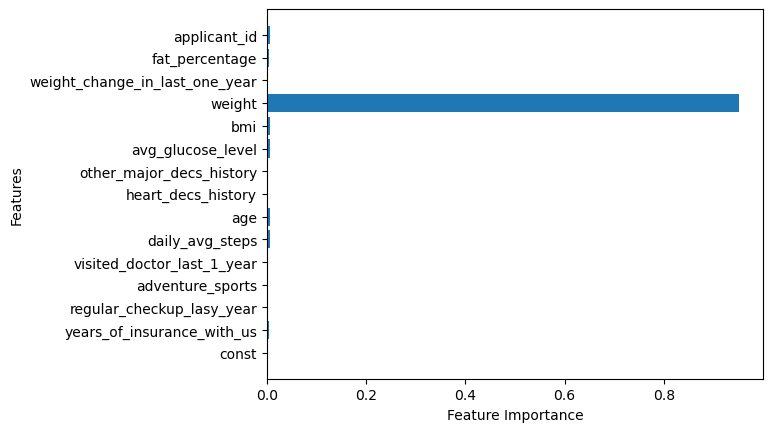

In [70]:

import matplotlib.pyplot as plt

feature_importances = random_forest_model.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

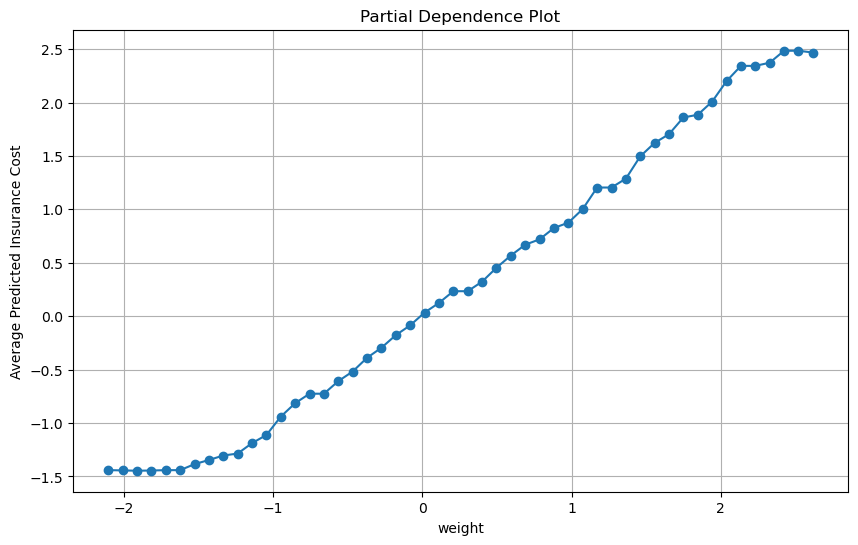

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have random_forest_model and X_test prepared
# Replace with your actual data

# Choose the feature you want to create PDP for
feature_to_plot = 'weight'  # Replace with the feature you want to plot

# Values to vary for the chosen feature
feature_values = np.linspace(min(X_test[feature_to_plot]), max(X_test[feature_to_plot]), num=50)

# Initialize an array to store average predicted values
average_predictions = []

# Calculate average predictions for each value of the chosen feature
for value in feature_values:
    X_temp = X_test.copy()
    X_temp[feature_to_plot] = value
    predictions = random_forest_model.predict(X_temp)
    average_predictions.append(np.mean(predictions))

# Plot the PDP
plt.figure(figsize=(10, 6))
plt.plot(feature_values, average_predictions, marker='o')
plt.xlabel(feature_to_plot)
plt.ylabel('Average Predicted Insurance Cost')
plt.title('Partial Dependence Plot')
plt.grid(True)
plt.show()

## 2). Model Tuning and business implication	

## a.Ensemble modelling, wherever applicable	 

In [74]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have X_train and y_train prepared

# Create a DecisionTreeRegressor model
dTreeRegressor = DecisionTreeRegressor(random_state=1)
dTreeRegressor.fit(X_train, y_train)

# Predict using the trained model
y_pred = dTreeRegressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print performance metric
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.0979979421157996


### Ensemble Learning - Bagging

In [97]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.9666666666666667


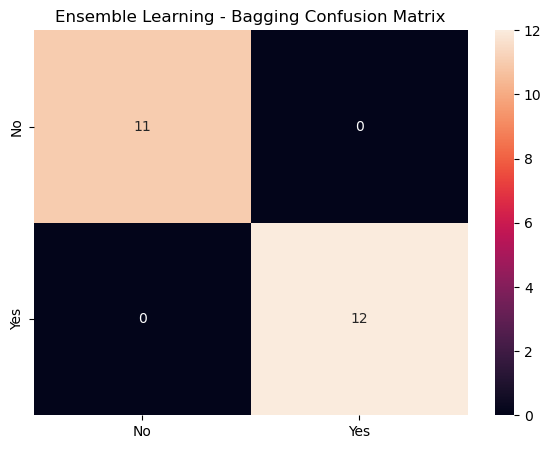

In [99]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.title("Ensemble Learning - Bagging Confusion Matrix")
plt.show()

### Ensemble Learning - AdaBoosting

In [91]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.9666666666666667


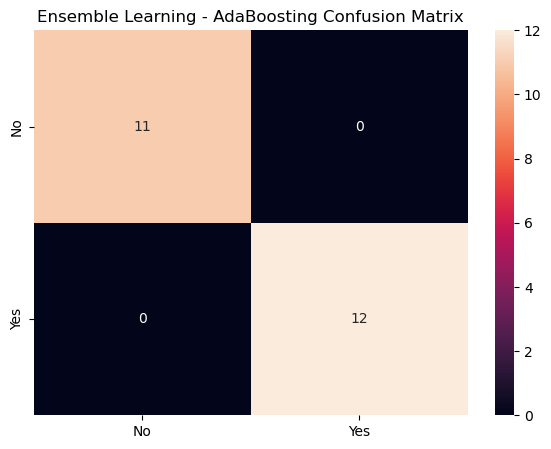

In [95]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.title("Ensemble Learning - AdaBoosting Confusion Matrix")
plt.show()

### Ensemble Learning - GradientBoost

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.9666666666666667


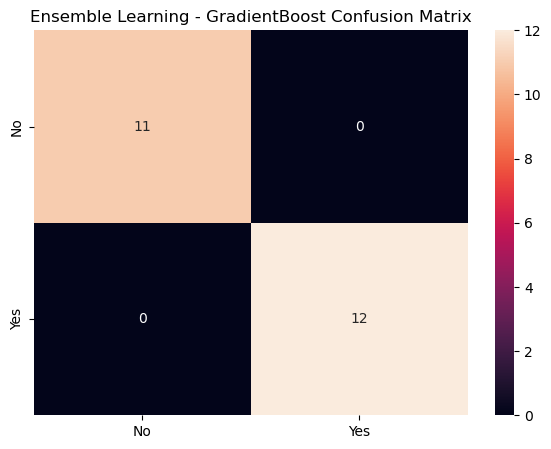

In [94]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.title("Ensemble Learning - GradientBoost Confusion Matrix")
plt.show()

### Ensemble RandomForest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.9666666666666667


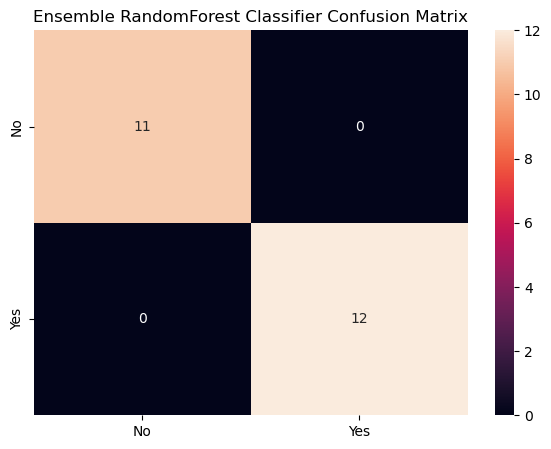

In [93]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.title("Ensemble RandomForest Classifier Confusion Matrix")
plt.show()

In [100]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


In [102]:
# Calculate precision
precision = precision_score(y_test, y_predict, average='weighted')

In [103]:
# Calculate recall
recall = recall_score(y_test, y_predict, average='weighted')

In [104]:
# Calculate F1-score
f1 = f1_score(y_test, y_predict, average='weighted')

In [105]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9714285714285714
Recall: 0.9666666666666667
F1-score: 0.9672820512820512


### b. Any other model tuning measures(if applicable)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

In [107]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Evaluate the best model on the test data
predicted_insurance_costs = best_model.predict(X_test_no_const)
mse = mean_squared_error(y_test, predicted_insurance_costs)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


ValueError: X has 14 features, but RandomForestRegressor is expecting 4 features as input.

In [110]:
print("Number of features expected by the model:", best_model.n_features_in_)

Number of features expected by the model: 4


In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have trained the RandomForestRegressor model and obtained the best parameters

# Create the best model with the best parameters
best_model = RandomForestRegressor(max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, n_estimators=100)

# Train the best model on the entire training data
best_model.fit(X_train, y_train)  # Replace X_train with your actual training data and y_train with your actual target data

# Predict insurance costs on the modified test data using the trained best model
predicted_insurance_costs = best_model.predict(X_test)  # Replace X_test with your actual test data

# Evaluate the model's performance
mse = mean_squared_error(y_test, predicted_insurance_costs)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted_insurance_costs)
mape = np.mean(np.abs((y_test - predicted_insurance_costs) / y_test)) * 100
r2 = r2_score(y_test, predicted_insurance_costs)

# Print the evaluation metrics
print("Best Model Evaluation:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r2)

Best Model Evaluation:
MSE: 0.030900178338155625
RMSE: 0.17578446557689797
MAE: 0.052860866910866895
MAPE: nan
R-squared: 0.9426594628776493


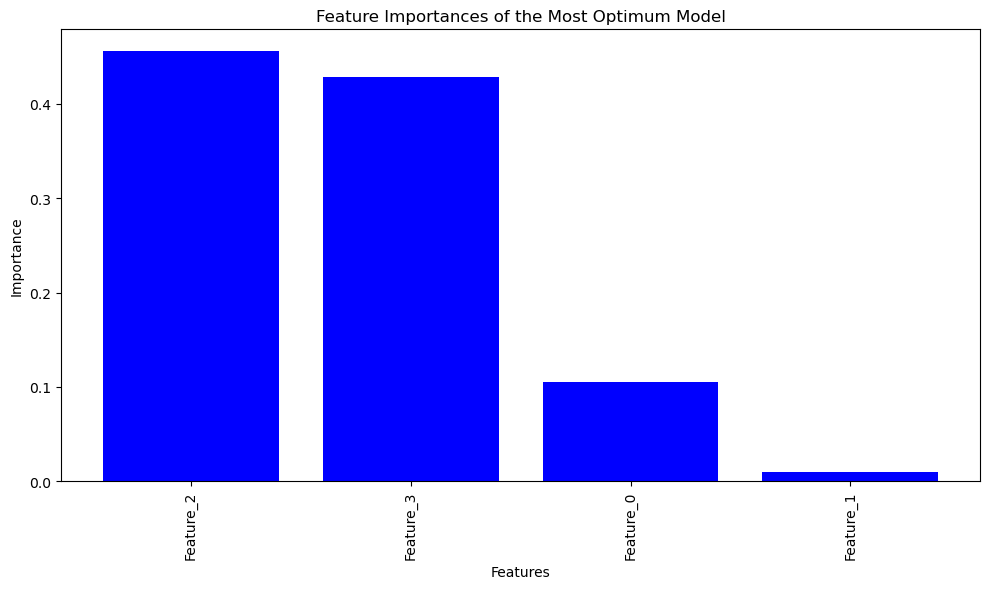

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the best_model and X_train

# Get the feature importances from the best_model
feature_importances = best_model.feature_importances_

# Get the names of the features
feature_names = np.array([f'Feature_{i}' for i in range(X_train.shape[1])])  # Replace with appropriate names if available

# Sort the features based on their importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], tick_label=feature_names[sorted_indices], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances of the Most Optimum Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

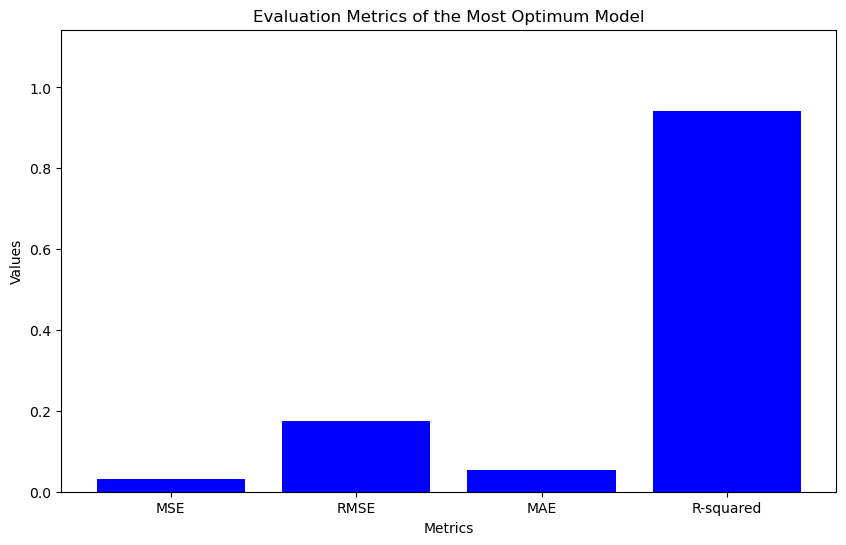

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluation results
mse = 0.030900178338155625
rmse = 0.17578446557689797
mae = 0.052860866910866895
r2 = 0.9426594628776493

# Create a bar plot to visualize the evaluation metrics
metrics = ['MSE', 'RMSE', 'MAE', 'R-squared']
values = [mse, rmse, mae, r2]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='blue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics of the Most Optimum Model')
plt.ylim(0, max(values) + 0.2)  # Adjust ylim for better visualization
plt.show()

In [119]:
import numpy as np

# Assuming you have the best_model and X_train

# Get the feature importances from the best_model
feature_importances = best_model.feature_importances_

# Get the names of the features
feature_names = np.array([f'Feature_{i}' for i in range(X_train.shape[1])])  # Replace with appropriate names if available

# Sort the features based on their importances
sorted_indices = np.argsort(feature_importances)[::-1]

# List the features and their corresponding importances
for feature_index in sorted_indices:
    print(f"{feature_names[feature_index]}: {feature_importances[feature_index]}")

Feature_2: 0.4561440232113274
Feature_3: 0.4288859082420651
Feature_0: 0.10481977578463006
Feature_1: 0.010150292761977486
